Regresi non linear menggunakan persamaan berpangkat

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive
import math

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  df  = pd.read_csv('/content/drive/MyDrive/Nasi Goreng Babat/camera_dataset.csv') #ganti path sesuai drive masing masing
except:
  print("File tidak ditemukan cik\n Silahkan upload file dibawah ini")
  uploaded = files.upload()
  nama_file = list(uploaded.keys())[0]
  df  = pd.read_csv(nama_file)

File tidak ditemukan cik
 Silahkan upload file dibawah ini


Saving camera_dataset_lagi2.csv to camera_dataset_lagi2.csv


In [ ]:
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,1.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,1.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,1.0,1.0,45.0,45.0,1.0,1.0,2.0,1.0,1.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,1.0,35.0,35.0,1.0,1.0,4.0,1.0,1.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,1.0,43.0,43.0,50.0,1.0,40.0,300.0,128.0,1299.0


In [ ]:
X = df.iloc[:, 9:10].values # mengambil data storage
y = df.iloc[:, 12].values # mengambil data price

In [ ]:
X.shape

(1038, 1)

In [ ]:
y.shape

(1038,)

In [ ]:
# Langkah 1
p = np.array([])
for i in range(len(y)):
    p = np.append(p, math.log(y[i], 10))
q = np.array([])
for i in range(len(X)):
    if X[i, 0] != 0:
        q = np.append(q, math.log(X[i, 0], 10))
pTotal = np.sum(p)
qTotal = np.sum(q)
xTotal = np.sum(X)
yTotal = np.sum(y)

xApalahItuNamanyaYangAdaGarisDiatas = xTotal / len(X)
yApalahItuNamanyaYangAdaGarisDiatas = yTotal / len(y)
pApalahItuNamanyaYangAdaGarisDiatas = pTotal / len(p)
qApalahItuNamanyaYangAdaGarisDiatas = qTotal / len(q)

In [ ]:
#Langkah 2
piqi = 0
for i in range(len(p)):

    piqi += p[i]*q[i]

qKuadrat = 0
for i in range(len(X)):
    qKuadrat += q[i]**2

In [ ]:
#Langkah 3
b = ((len(X) * piqi) - (pTotal * qTotal))/((len(X) * qKuadrat) - (qTotal**2))
R = pApalahItuNamanyaYangAdaGarisDiatas - (b * qApalahItuNamanyaYangAdaGarisDiatas)
a = 10**R

In [ ]:
dtKuadrat = 0
for i in range(len(y)):
    dtKuadrat += (y[i] - yApalahItuNamanyaYangAdaGarisDiatas)**2
dKuadrat = 0
for i in range(len(X)):
    dKuadrat += (y[i] - (a*(X[i,0]**b)))**2

In [ ]:
try:
  r = math.sqrt((dtKuadrat-dKuadrat) / dtKuadrat)
  if 0.9 <= r <= 1:
    print(f"Nilai r = {r} - Hasil sangat baik.")
  elif 0.8 <= r < 0.9:
    print(f"Nilai r = {r} - Hasil baik.")
  elif 0.7 <= r < 0.8:
    print(f"Nilai r = {r} - Hasil cukup baik.")
  elif 0.6 <= r < 0.7:
    print(f"Nilai r = {r} - Hasil lumayan baik.")
  else:
    print(f"Nilai r = {r} - Hasil tidak baik.")

except:
  print(f"r merupakan bilangan imajiner karena (dt**2-d**2)/dt**2 = {((dtKuadrat-dKuadrat) / dtKuadrat)}")
  print("Jadi r tidak bisa diakar kan")

Nilai r = 0.13761015248549865 - Hasil tidak baik.


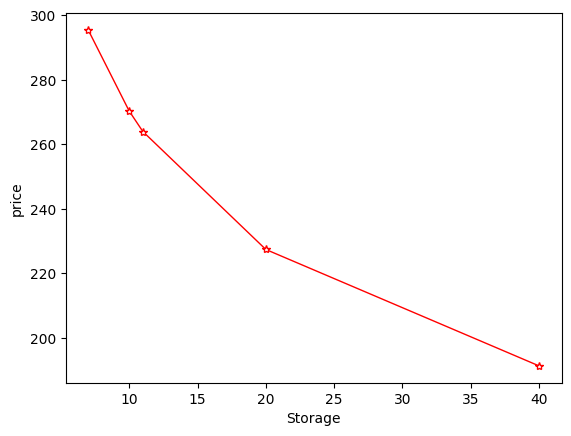

In [ ]:
import matplotlib.pyplot as plt
xTest = np.array([7,10,11,20, 40])
plt.plot(xTest, a * (xTest ** b), 'r', marker='*', markerfacecolor='white', markersize=6, linewidth=1, label="Hasil Prediksi")
plt.xlabel('Storage')
plt.ylabel('price')
plt.show()

In [ ]:
print(f"Karena nilai r = {r} tidak mendekati 1 maka hasilnya ngawur cik😋")

Karena nilai r = 0.13761015248549865 tidak mendekati 1 maka hasilnya ngawur cik😋
